Output of the image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Shape of the image: (32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                   

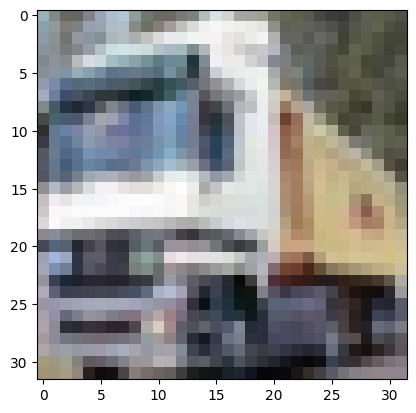

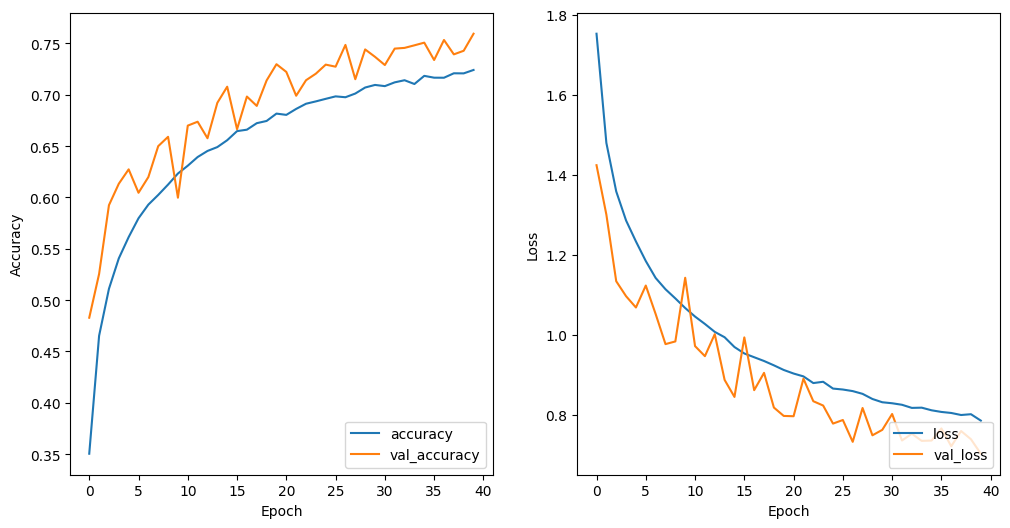

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_8 (Flatten)         (None, 2048)             

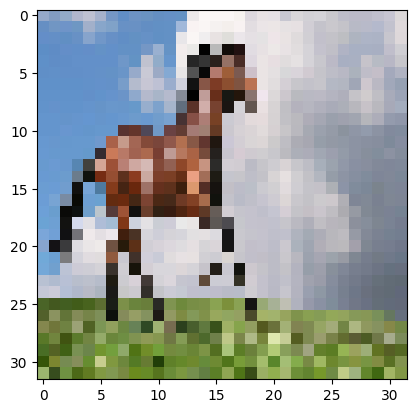

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load CIFAR-10 dataset
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# One hot encode target values
ytrain = tf.keras.utils.to_categorical(ytrain, 10)
ytest = tf.keras.utils.to_categorical(ytest, 10)

# See the particular image from index
plt.imshow(xtrain[1])
print(f'Output of the image: {(ytrain[1])}')
print(f'Shape of the image: {xtrain[0].shape}')  # The image dimensions are 32x32x3

def create_cnn_model():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def plot_metrics_for_training(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(122)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='lower right')

    plt.show()

CNN_model = create_cnn_model()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(xtrain)
history_for_plotting = CNN_model.fit(datagen.flow(xtrain, ytrain, batch_size=64), epochs=40, validation_data=(xtest, ytest), shuffle=True)
plot_metrics_for_training(history_for_plotting)

def create_folder():
    try:
        os.mkdir('Model')
    except FileExistsError:
        pass

create_folder()
CNN_model.save_weights('Model/CIFAR10_Model.h5')

Loaded_model = create_cnn_model()
Loaded_model.load_weights('Model/CIFAR10_Model.h5')

# Display the results from previous weights on test cases
print(Loaded_model.evaluate(xtest, ytest))

# Provide value and on that basis it's going to fetch one value
index = int(input(f'Enter value between 0 to {len(xtrain)}: '))
plt.imshow(xtrain[index])
output = Loaded_model.predict(xtrain[index].reshape(1, 32, 32, 3))
output = np.argmax(output[0])
print(f"Predicted by Model: {output}")

def load_image(filename):
    # Load the image
    img = tf.keras.utils.load_img(filename, target_size=(32, 32))
    # Convert to array
    img = tf.keras.utils.img_to_array(img)
    # Normalize the image
    img = img.astype('float32') / 255.0
    # Reshape into a single sample with 3 channels
    plt.imshow(img)
    img = img.reshape(1, 32, 32, 3)
    return img

img = load_image('/content/horse.jpg')
print(np.argmax(Loaded_model.predict(img)))


1/1 [==============================] - 0s 20ms/step
Predicted class index: 7
Predicted class: Horse


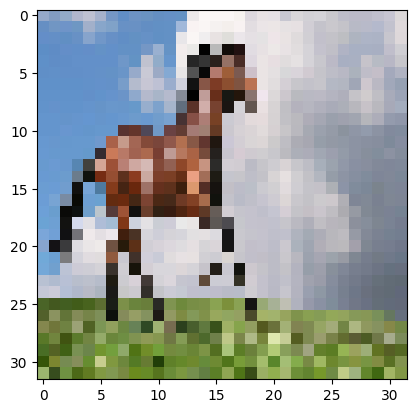

In [6]:
# Define the class labels for CIFAR-10
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the image and make a prediction
img = load_image('/content/horse.jpg')
prediction = Loaded_model.predict(img)
predicted_class_index = np.argmax(prediction)

# Print the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class: {predicted_class_label}")
